<a href="https://colab.research.google.com/github/Marriyam/Artificial-Intelligence/blob/main/Loan_Fraud_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading Dataset From Kaggle**

In [1]:
 ! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"marriyamnadeem","key":"e04a80ca333d6d440d669a0a6a9db95d"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/



In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
 ! kaggle datasets list

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                        Netflix TV Shows and Movies                           2MB  2022-05-15 00:01:23          10560        320  1.0              
devansodariya/student-performance-data                          Student Performance Dataset                           7KB  2022-05-26 13:55:09           5950        181  0.9705882        
mohamedharris/supermart-grocery-sales-retail-analytics-dataset  Supermart Grocery Sales - Retail Analytics Dataset  191KB  2022-06-12 16:14:44            917         46  0.88235295       
sameepvani/nasa-nearest-earth-objects                       

In [7]:
! kaggle datasets download -d wordsforthewise/lending-club

 98% 1.24G/1.26G [00:11<00:00, 159MB/s]
100% 1.26G/1.26G [00:11<00:00, 115MB/s]


In [8]:
! unzip lending-club.zip

Archive:  lending-club.zip
  inflating: accepted_2007_to_2018Q4.csv.gz  
  inflating: accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv  
  inflating: rejected_2007_to_2018Q4.csv.gz  
  inflating: rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv  


**Installing PySpark and All the Libraries**

In [9]:
! pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 46 kB/s 
     |████████████████████████████████| 199 kB 54.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=6122310d97697a860243ab3dee0e5215d49373b07f95c6771fe25f23dcca084d
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [10]:
#first load all the useful libraries
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession


In [11]:
#create the spark session
spark = SparkSession.builder.appName('Loan Fraud Detection').getOrCreate()
spark

In [12]:
#Loading data from Colab
df = spark.read.csv('/content/accepted_2007_to_2018Q4.csv.gz',header = True)
df.show()

+--------+---------+---------+-----------+---------------+----------+--------+-----------+-----+---------+--------------------+----------+--------------+----------+-------------------+--------+-----------+----------+--------------------+----+------------------+--------------------+--------+----------+-----+-----------+----------------+--------------+---------------+--------------+----------------------+----------------------+--------+-------+---------+----------+---------+-------------------+---------+-------------+------------------+---------------+---------------+-------------+------------------+----------+-----------------------+------------+---------------+------------+------------------+--------------------+-------------------+--------------------------+---------------------------+-----------+----------------+----------------+---------+-------------------------+--------------+------------+-----------+-----------+-----------+-----------+-----------+------------------+------------+-

In [13]:
df2 = spark.read.csv('/content/rejected_2007_to_2018Q4.csv.gz',header = True)
df2.show()

+----------------+----------------+--------------------+----------+--------------------+--------+-----+-----------------+-----------+
|Amount Requested|Application Date|          Loan Title|Risk_Score|Debt-To-Income Ratio|Zip Code|State|Employment Length|Policy Code|
+----------------+----------------+--------------------+----------+--------------------+--------+-----+-----------------+-----------+
|          1000.0|      2007-05-26|Wedding Covered b...|     693.0|                 10%|   481xx|   NM|          4 years|        0.0|
|          1000.0|      2007-05-26|  Consolidating Debt|     703.0|                 10%|   010xx|   MA|         < 1 year|        0.0|
|         11000.0|      2007-05-27|Want to consolida...|     715.0|                 10%|   212xx|   MD|           1 year|        0.0|
|          6000.0|      2007-05-27|             waksman|     698.0|              38.64%|   017xx|   MA|         < 1 year|        0.0|
|          1500.0|      2007-05-27|              mdrigo|     5

In [ ]:
df.printSchema()


root
 |-- id: string (nullable = true)
 |-- member_id: string (nullable = true)
 |-- loan_amnt: string (nullable = true)
 |-- funded_amnt: string (nullable = true)
 |-- funded_amnt_inv: string (nullable = true)
 |-- term: string (nullable = true)
 |-- int_rate: string (nullable = true)
 |-- installment: string (nullable = true)
 |-- grade: string (nullable = true)
 |-- sub_grade: string (nullable = true)
 |-- emp_title: string (nullable = true)
 |-- emp_length: string (nullable = true)
 |-- home_ownership: string (nullable = true)
 |-- annual_inc: string (nullable = true)
 |-- verification_status: string (nullable = true)
 |-- issue_d: string (nullable = true)
 |-- loan_status: string (nullable = true)
 |-- pymnt_plan: string (nullable = true)
 |-- url: string (nullable = true)
 |-- desc: string (nullable = true)
 |-- purpose: string (nullable = true)
 |-- title: string (nullable = true)
 |-- zip_code: string (nullable = true)
 |-- addr_state: string (nullable = true)
 |-- dti: string 

In [ ]:
df2.printSchema()


root
 |-- Amount Requested: string (nullable = true)
 |-- Application Date: string (nullable = true)
 |-- Loan Title: string (nullable = true)
 |-- Risk_Score: string (nullable = true)
 |-- Debt-To-Income Ratio: string (nullable = true)
 |-- Zip Code: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Employment Length: string (nullable = true)
 |-- Policy Code: string (nullable = true)



In [ ]:
df.count()


2260701

In [ ]:
df2.count()


27648741

In [ ]:
#Describing the dataset with count, max min etc
for col in df.columns:
 df.describe([col]).show()


+-------+--------------------+
|summary|                  id|
+-------+--------------------+
|  count|             2260701|
|   mean| 8.032205972323003E7|
| stddev| 4.498561131290138E7|
|    min|             1000007|
|    max|Total amount fund...|
+-------+--------------------+

+-------+---------+
|summary|member_id|
+-------+---------+
|  count|        0|
|   mean|     null|
| stddev|     null|
|    min|     null|
|    max|     null|
+-------+---------+

+-------+------------------+
|summary|         loan_amnt|
+-------+------------------+
|  count|           2260668|
|   mean|15046.931227849467|
| stddev| 9190.245488233173|
|    min|            1000.0|
|    max|            9975.0|
+-------+------------------+

+-------+------------------+
|summary|       funded_amnt|
+-------+------------------+
|  count|           2260668|
|   mean|15041.664056818605|
| stddev| 9188.413022382165|
|    min|            1000.0|
|    max|            9975.0|
+-------+------------------+

+-------+------

In [ ]:
for col in df2.columns:
  df2.describe([col]).show()


+-------+------------------+
|summary|  Amount Requested|
+-------+------------------+
|  count|          27648741|
|   mean|13133.240308610437|
| stddev|15009.636324282348|
|    min|               0.0|
|    max|            9999.0|
+-------+------------------+

+-------+----------------+
|summary|Application Date|
+-------+----------------+
|  count|        27648741|
|   mean|            null|
| stddev|            null|
|    min|      2007-05-26|
|    max|      2018-12-31|
+-------+----------------+

+-------+--------------------+
|summary|          Loan Title|
+-------+--------------------+
|  count|            27647438|
|   mean|            Infinity|
| stddev|                 NaN|
|    min|\tdebt_consolidation|
|    max|â¥â£â¥â¥â¥â...|
+-------+--------------------+

+-------+--------------------+
|summary|          Risk_Score|
+-------+--------------------+
|  count|             9151111|
|   mean|   628.1720981389143|
| stddev|   89.93679452492981|
|    min|"" I'd get sick t..

**Counting the Null Values**

In [ ]:
for col in df.columns:

 print(col, "\t", "with null values: ", df.filter(df[col].isNull()).count())

id 	 with null values:  0
member_id 	 with null values:  2260701
loan_amnt 	 with null values:  33
funded_amnt 	 with null values:  33
funded_amnt_inv 	 with null values:  33
term 	 with null values:  33
int_rate 	 with null values:  33
installment 	 with null values:  33
grade 	 with null values:  33
sub_grade 	 with null values:  33
emp_title 	 with null values:  167002
emp_length 	 with null values:  146940
home_ownership 	 with null values:  33
annual_inc 	 with null values:  37
verification_status 	 with null values:  33
issue_d 	 with null values:  33
loan_status 	 with null values:  33
pymnt_plan 	 with null values:  33
url 	 with null values:  33
desc 	 with null values:  2134633
purpose 	 with null values:  34
title 	 with null values:  23359
zip_code 	 with null values:  35
addr_state 	 with null values:  34
dti 	 with null values:  1745
delinq_2yrs 	 with null values:  63
earliest_cr_line 	 with null values:  63
fico_range_low 	 with null values:  34
fico_range_high 	 with n

In [ ]:
for col in df2.columns:

  print(col, "\t", "with null values: ", df2.filter(df2[col].isNull()).count())

Amount Requested 	 with null values:  0
Application Date 	 with null values:  0
Loan Title 	 with null values:  1303
Risk_Score 	 with null values:  18497630
Debt-To-Income Ratio 	 with null values:  0
Zip Code 	 with null values:  293
State 	 with null values:  22
Employment Length 	 with null values:  951355
Policy Code 	 with null values:  918


**Counting Values with Question Mark**

In [ ]:
for col in df.columns:
 print(col, "\t", "with ‘?’ values: ", df.filter(df[col]=="?").count())


id 	 with ‘?’ values:  0
member_id 	 with ‘?’ values:  0
loan_amnt 	 with ‘?’ values:  0
funded_amnt 	 with ‘?’ values:  0
funded_amnt_inv 	 with ‘?’ values:  0
term 	 with ‘?’ values:  0
int_rate 	 with ‘?’ values:  0
installment 	 with ‘?’ values:  0
grade 	 with ‘?’ values:  0
sub_grade 	 with ‘?’ values:  0
emp_title 	 with ‘?’ values:  0
emp_length 	 with ‘?’ values:  0
home_ownership 	 with ‘?’ values:  0
annual_inc 	 with ‘?’ values:  0
verification_status 	 with ‘?’ values:  0
issue_d 	 with ‘?’ values:  0
loan_status 	 with ‘?’ values:  0
pymnt_plan 	 with ‘?’ values:  0
url 	 with ‘?’ values:  0
desc 	 with ‘?’ values:  0
purpose 	 with ‘?’ values:  0
title 	 with ‘?’ values:  0
zip_code 	 with ‘?’ values:  0
addr_state 	 with ‘?’ values:  0
dti 	 with ‘?’ values:  0
delinq_2yrs 	 with ‘?’ values:  0
earliest_cr_line 	 with ‘?’ values:  0
fico_range_low 	 with ‘?’ values:  0
fico_range_high 	 with ‘?’ values:  0
inq_last_6mths 	 with ‘?’ values:  0
mths_since_last_delinq 	 wi

In [ ]:
for col in df2.columns:
  print(col, "\t", "with ‘?’ values: ", df2.filter(df2[col]=="?").count())


Amount Requested 	 with ‘?’ values:  0
Application Date 	 with ‘?’ values:  0
Loan Title 	 with ‘?’ values:  0
Risk_Score 	 with ‘?’ values:  0
Debt-To-Income Ratio 	 with ‘?’ values:  0
Zip Code 	 with ‘?’ values:  0
State 	 with ‘?’ values:  0
Employment Length 	 with ‘?’ values:  0
Policy Code 	 with ‘?’ values:  0


**Handling Missing Values Using Mean**

In [ ]:
from pyspark.sql.functions import avg

def mean_of_pyspark_columns(df2, numeric_cols, verbose=False):
    col_with_mean=[]
    for col in numeric_cols:
        mean_value = df2.select(avg(df2[col]))
        avg_col = mean_value.columns[0]
        res = mean_value.rdd.map(lambda row : row[avg_col]).collect()
        if (verbose==True): print(mean_value.columns[0], "\t", res[0])
        col_with_mean.append([col, res[0]])    
    return col_with_mean



In [ ]:
from pyspark.sql.functions import when, lit

def fill_missing_with_mean(df2, numeric_cols):
    col_with_mean = mean_of_pyspark_columns(df2, numeric_cols) 
    
    for col, mean in col_with_mean:
        df2 = df2.withColumn(col, when(df2[col].isNull()==True, 
        lit(mean)).otherwise(df2[col]))
        
    return df2


numeric_cols=['Amount Requested', 'Application Date', 'Loan Title', 'Risk_Score', 'Debt-To-Income Ratio', 'Zip Code', 'State','Employment Length', 'Policy Code'
]
df2 = fill_missing_with_mean(df2, numeric_cols)

**Handling Missing Values Through Replacement with TBF**

In [ ]:
from pyspark.sql.types import StructType,StructField, StringType, IntegerType

df2 = df2.fillna(value="TBF")
df2.show()

+----------------+----------------+--------------------+----------+--------------------+--------+-----+-----------------+-----------+
|Amount Requested|Application Date|          Loan Title|Risk_Score|Debt-To-Income Ratio|Zip Code|State|Employment Length|Policy Code|
+----------------+----------------+--------------------+----------+--------------------+--------+-----+-----------------+-----------+
|          1000.0|      2007-05-26|Wedding Covered b...|     693.0|                 10%|   481xx|   NM|          4 years|        0.0|
|          1000.0|      2007-05-26|  Consolidating Debt|     703.0|                 10%|   010xx|   MA|         < 1 year|        0.0|
|         11000.0|      2007-05-27|Want to consolida...|     715.0|                 10%|   212xx|   MD|           1 year|        0.0|
|          6000.0|      2007-05-27|             waksman|     698.0|              38.64%|   017xx|   MA|         < 1 year|        0.0|
|          1500.0|      2007-05-27|              mdrigo|     5

In [ ]:
for col in df2.columns:
  df2.filter(df2[col].isNull()).fillna(value="TBF")

In [ ]:
for col in df2.columns:

  print(col, "\t", "with null values: ", df2.filter(df2[col].isNull()).count())


Amount Requested 	 with null values:  0
Application Date 	 with null values:  0
Loan Title 	 with null values:  0
Risk_Score 	 with null values:  0
Debt-To-Income Ratio 	 with null values:  0
Zip Code 	 with null values:  0
State 	 with null values:  0
Employment Length 	 with null values:  0
Policy Code 	 with null values:  0


In [ ]:
df2 = df2.na.fill(0).na.fill('TBF')


In [ ]:
from pyspark.sql.functions import avg

def mean_of_pyspark_columns(df, numeric_cols, verbose=False):
    col_with_mean=[]
    for col in numeric_cols:
        mean_value = df.select(avg(df[col]))
        avg_col = mean_value.columns[0]
        res = mean_value.rdd.map(lambda row : row[avg_col]).collect()
        if (verbose==True): print(mean_value.columns[0], "\t", res[0])
        col_with_mean.append([col, res[0]])    
    return col_with_mean



In [ ]:
from pyspark.sql.functions import when, lit

def fill_missing_with_mean(df, numeric_cols):
    col_with_mean = mean_of_pyspark_columns(df, numeric_cols) 
    
    for col, mean in col_with_mean:
        df = df.withColumn(col, when(df[col].isNull()==True, 
        lit(mean)).otherwise(df[col]))
        
    return df


numeric_cols=['id','member_id','loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','grade','sub_grade','emp_title','emp_length','home_ownership','annual_inc','verification_status','issue_d','loan_status','pymnt_plan','url','desc','purpose','title','zip_code','addr_state','dti','delinq_2yrs','earliest_cr_line','fico_range_low','fico_range_high','inq_last_6mths','mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec','revol_bal','revol_util','total_acc','initial_list_status','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d','last_fico_range_high','last_fico_range_low','collections_12_mths_ex_med','mths_since_last_major_derog','policy_code','application_type','annual_inc_joint','dti_joint','verification_status_joint','acc_now_delinq','tot_coll_amt','tot_cur_bal','open_acc_6m','open_act_il','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util','chargeoff_within_12_mths','delinq_amnt','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','pub_rec_bankruptcies','tax_liens','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit','revol_bal_joint','sec_app_fico_range_low','sec_app_fico_range_high','sec_app_earliest_cr_line','sec_app_inq_last_6mths','sec_app_mort_acc','sec_app_open_acc','sec_app_revol_util','sec_app_open_act_il','sec_app_num_rev_accts','sec_app_chargeoff_within_12_mths','sec_app_collections_12_mths_ex_med','sec_app_mths_since_last_major_derog','hardship_flag','hardship_type','hardship_reason','hardship_status','deferral_term','hardship_amount','hardship_start_date','hardship_end_date','payment_plan_start_date','hardship_length','hardship_dpd','hardship_loan_status','orig_projected_additional_accrued_interest','hardship_payoff_balance_amount','hardship_last_payment_amount','disbursement_method','debt_settlement_flag','debt_settlement_flag_date','settlement_status','settlement_date','settlement_amount','settlement_percentage','settlement_term'
]
df = fill_missing_with_mean(df, numeric_cols)

In [ ]:
from pyspark.sql.types import StructType,StructField, StringType, IntegerType

df = df.fillna(value="TBF")
df.show()

+--------+---------+---------+-----------+---------------+----------+--------+-----------+-----+---------+--------------------+----------+--------------+----------+-------------------+--------+-----------+----------+--------------------+----+------------------+--------------------+--------+----------+-----+-----------+----------------+--------------+---------------+--------------+----------------------+----------------------+--------+-------+---------+----------+---------+-------------------+---------+-------------+------------------+---------------+---------------+-------------+------------------+----------+-----------------------+------------+---------------+------------------+------------------+--------------------+-------------------+--------------------------+---------------------------+-----------+----------------+------------------+------------------+-------------------------+--------------+------------+-----------+-----------+-----------+-----------+-----------+----------------

In [ ]:
df = df.na.fill(0).na.fill('TBF')


In [ ]:
for col in df.columns:

  print(col, "\t", "with null values: ", df.filter(df[col].isNull()).count())

id 	 with null values:  0
member_id 	 with null values:  0
loan_amnt 	 with null values:  0
funded_amnt 	 with null values:  0
funded_amnt_inv 	 with null values:  0
term 	 with null values:  0
int_rate 	 with null values:  0
installment 	 with null values:  0
grade 	 with null values:  0
sub_grade 	 with null values:  0
emp_title 	 with null values:  0
emp_length 	 with null values:  0
home_ownership 	 with null values:  0
annual_inc 	 with null values:  0
verification_status 	 with null values:  0
issue_d 	 with null values:  0
loan_status 	 with null values:  0
pymnt_plan 	 with null values:  0
url 	 with null values:  0
desc 	 with null values:  0
purpose 	 with null values:  0
title 	 with null values:  0
zip_code 	 with null values:  0
addr_state 	 with null values:  0
dti 	 with null values:  0
delinq_2yrs 	 with null values:  0
earliest_cr_line 	 with null values:  0
fico_range_low 	 with null values:  0
fico_range_high 	 with null values:  0
inq_last_6mths 	 with null values: 

**Histogram Plot**

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df.sample(False, 0.3, 42).count()

679217

In [26]:
from pyspark.sql.types import FloatType
df = df.withColumn("fico_range_low", df["fico_range_low"].cast(FloatType()))
sample_df=df.select(['fico_range_low']).sample(False, 0.2, 42)


In [27]:
pandas_df=sample_df.toPandas()


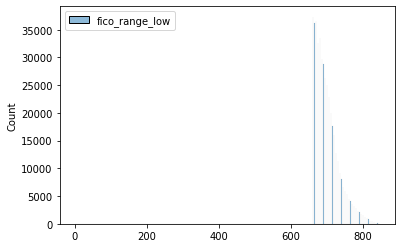

In [28]:
sns.histplot(pandas_df)

**Linear Model Plot**

In [29]:
from pyspark.sql.types import FloatType
df = df.withColumn("fico_range_high", df["fico_range_high"].cast(FloatType()))
sample_df=df.select(['fico_range_high']).sample(False, 0.2, 42)


In [30]:
pandas_df=sample_df.toPandas()


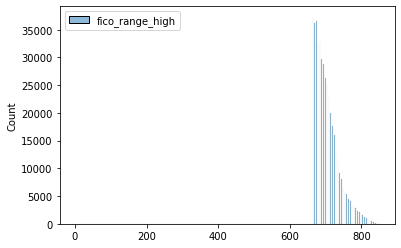

In [31]:
sns.histplot(pandas_df)

In [40]:
from pyspark.sql.types import FloatType
df2 = df2.withColumn("Amount Requested", df2["Amount Requested"].cast(FloatType()))
sample_df2=df2.select(['Amount Requested']).sample(False, 0.2, 42)


In [41]:
pandas_df2=sample_df2.toPandas()


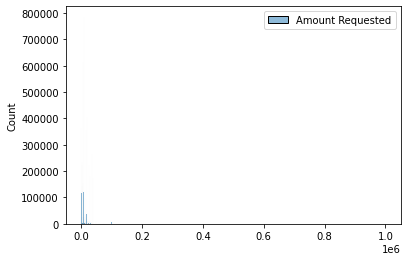

In [42]:
sns.histplot(pandas_df2)

**Relationship Plotting**

In [52]:
s_df = df.select(['fico_range_high', 'fico_range_low'])
s_df = s_df.sample(False, 0.2, 42)

In [53]:
pandas_df=s_df.toPandas()

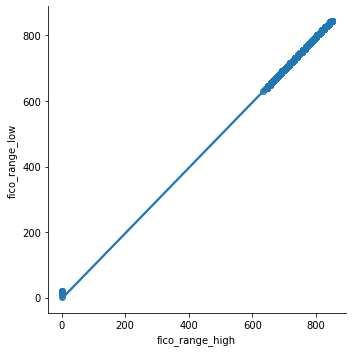

In [54]:
sns.lmplot(x="fico_range_high", y="fico_range_low", data=pandas_df)

In [62]:
from pyspark.sql.types import FloatType
df2 = df2.withColumn("Amount Requested", df2["Amount Requested"].cast(FloatType()))
df2 = df2.withColumn("Risk_Score", df2["Risk_Score"].cast(FloatType()))

In [63]:
s_df2 = df2.select(['Amount Requested', 'Risk_Score'])
s_df2= s_df2.sample(False, 0.2, 42)

In [64]:
pandas_df2=s_df2.toPandas()

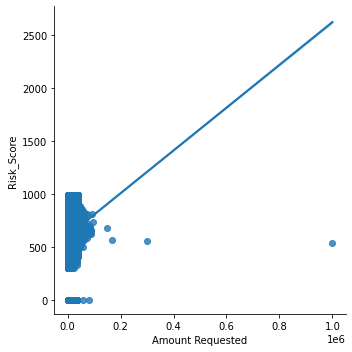

In [65]:
sns.lmplot(x="Amount Requested", y="Risk_Score", data=pandas_df2)